### Data Dictionary

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("cars_clus.csv")

In [3]:
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,CL,14.114,18.225,0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0
3,Acura,RL,8.588,29.725,0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,0,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,1.266,0
153,Volvo,S70,15.245,NaN,0,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2.724,0
154,Volvo,V70,17.531,NaN,0,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2.864,0
155,Volvo,C70,3.493,NaN,0,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,1.251,0


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   117 non-null    object 
 1   model      117 non-null    object 
 2   sales      117 non-null    float64
 3   resale     117 non-null    float64
 4   type       117 non-null    int64  
 5   price      117 non-null    float64
 6   engine_s   117 non-null    float64
 7   horsepow   117 non-null    float64
 8   wheelbas   117 non-null    float64
 9   width      117 non-null    float64
 10  length     117 non-null    float64
 11  curb_wgt   117 non-null    float64
 12  fuel_cap   117 non-null    float64
 13  mpg        117 non-null    float64
 14  lnsales    117 non-null    float64
 15  partition  117 non-null    int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 15.5+ KB


In [7]:
df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [8]:
df.drop(['manufact', 'model','type','partition'],axis=1,inplace=True)

In [9]:
df.shape

(117, 12)

In [10]:
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(df)

In [12]:
X

array([[-0.56455364, -0.14464769, -0.31723012, ..., -1.2208532 ,
         0.88524147, -0.43027206],
       [-0.26396817,  0.15952517,  0.17251014, ..., -0.16219228,
         0.20113809,  0.20404912],
       [-0.67602381,  1.01190147,  1.13779531, ...,  0.0495399 ,
        -0.4829653 , -0.93923036],
       ...,
       [-0.10717937, -0.11306217, -0.33852318, ..., -0.37392447,
         0.65720701,  0.39997555],
       [-0.66289787, -0.12604252, -0.42440517, ..., -1.08852059,
         0.42917255, -0.85740668],
       [-0.71605727, -0.36964042, -0.60113752, ..., -0.85032188,
         0.42917255, -1.26051967]])

### Use Dendogram

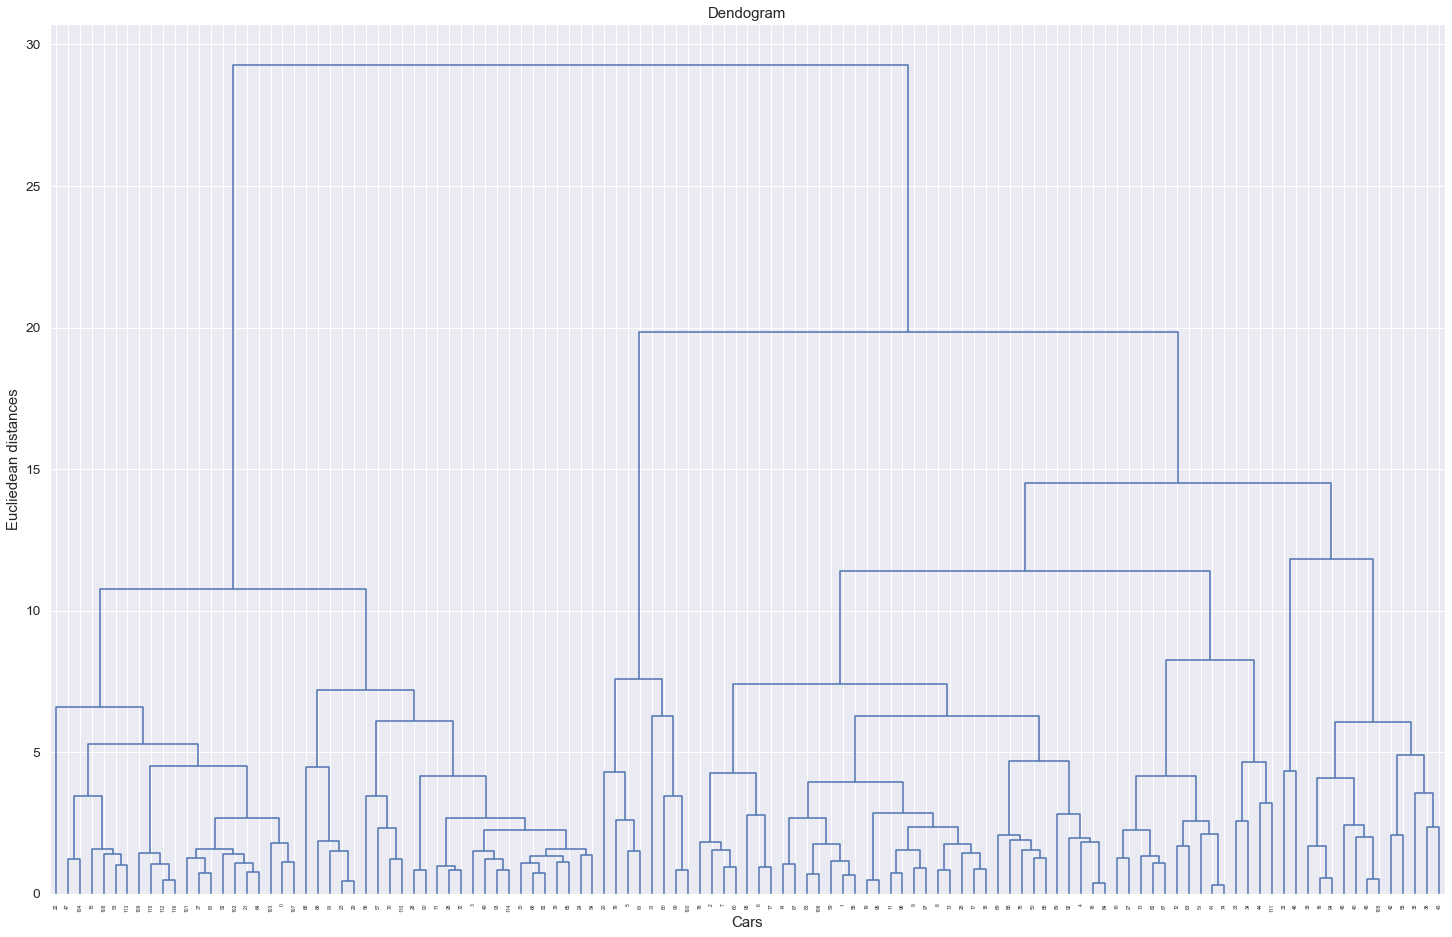

In [13]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=0)
plt.title("Dendogram")
plt.xlabel("Cars")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [14]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [15]:
y_hc = hc.fit_predict(X)

In [16]:
y_hc

array([1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [17]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [18]:
y

,Cluster
0,1
1,0
2,0
3,1
4,0
...,...
112,1
113,1
114,1
115,1


In [19]:
y['Cluster'].unique()

array([1, 0, 2], dtype=int64)

In [20]:
y['Cluster'].value_counts()

0    63
1    46
2     8
Name: Cluster, dtype: int64

In [21]:
newdf = pd.concat([df,y],axis=1)

In [22]:
newdf

,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,Cluster
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,1.0
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,1.0
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,NaN
146,83.721,13.240,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,NaN
147,51.102,16.725,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,NaN
148,9.569,16.575,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,NaN


In [23]:
newdf.dropna(inplace=True)

In [24]:
meandf = newdf.groupby(by='Cluster').mean()

In [25]:
meandf

,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
Cluster,,,,,,,,,,,,
0.0,56.796255,18.665319,27.663511,3.22766,189.042553,109.276596,71.919149,191.195745,3.486489,18.855319,23.017021,3.386702
1.0,65.684725,16.817000,25.237200,3.16500,185.450000,108.245000,71.540000,188.930000,3.350000,17.920000,24.100000,3.423750
2.0,55.169000,14.271667,20.999833,2.60000,163.166667,106.833333,71.250000,186.433333,3.161833,16.433333,25.166667,3.777000


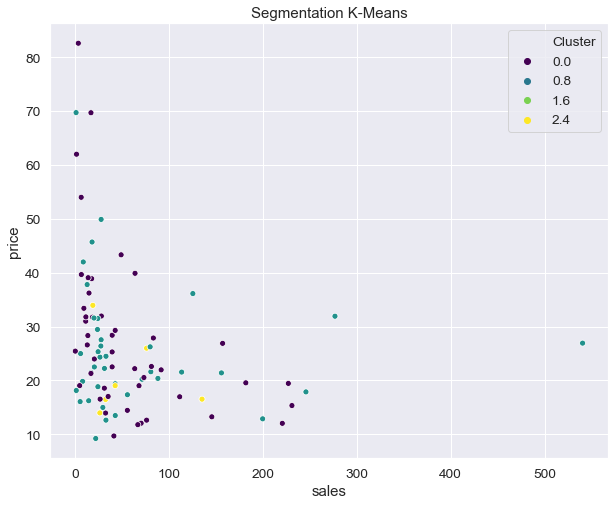

In [26]:
x_axis = newdf['sales']
y_axis = newdf['price']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()